<a href="https://colab.research.google.com/github/divyanshbajpai/EVA4-Coursework/blob/master/Assignment-12/Dog_Knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
!ls

gdrive	sample_data


In [4]:
cd gdrive/My\ Drive/Assignment12/dogs/

/content/gdrive/.shortcut-targets-by-id/1o3xlpL_QaLGK7CSbpRIcEQdiu5cTRbJ3/Assignment12/dogs


In [0]:
import json
from PIL import Image
import pandas as pd

In [0]:
with open("dog_annotations.json", "r") as read_file:
    data = json.load(read_file)

In [0]:
processed_df = pd.DataFrame(columns=['x', 'y', 'width','height','norm_x','norm_y','norm_width','norm_height'])

In [0]:
for row in data:
  my_dict = {
      "x" : 1,
      "y" : 1,
      "width": 1,
      "height": 1,
      "norm_x" : 1,
      "norm_y" : 1,
      "norm_width": 1,
      "norm_height": 1
  }
  filename = data[row]["filename"]
  image = Image.open(filename)
  dim = image.size
  my_dict["x"] = data[row]["regions"][0]["shape_attributes"]["x"]
  my_dict["y"] = data[row]["regions"][0]["shape_attributes"]["y"]
  my_dict["width"] = data[row]["regions"][0]["shape_attributes"]["width"]
  my_dict["height"] = data[row]["regions"][0]["shape_attributes"]["height"]
  my_dict["norm_x"] = data[row]["regions"][0]["shape_attributes"]["x"] / dim[0]
  my_dict["norm_y"] = data[row]["regions"][0]["shape_attributes"]["y"] / dim[1]
  my_dict["norm_width"] = data[row]["regions"][0]["shape_attributes"]["width"] / dim[0]
  my_dict["norm_height"] = data[row]["regions"][0]["shape_attributes"]["height"] / dim[1]
  my_series = pd.Series(my_dict)
  processed_df = processed_df.append(my_series, ignore_index=True)
  

In [10]:
processed_df.head()

,x,y,width,height,norm_x,norm_y,norm_width,norm_height
0,106.0,9.0,159.0,155.0,0.347541,0.054545,0.521311,0.939394
1,111.0,22.0,91.0,108.0,0.403636,0.120219,0.330909,0.590164
2,100.0,7.0,106.0,158.0,0.333333,0.041667,0.353333,0.940476
3,50.0,12.0,252.0,145.0,0.163934,0.072727,0.826230,0.878788
4,44.0,19.0,127.0,190.0,0.195556,0.084444,0.564444,0.844444


In [0]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

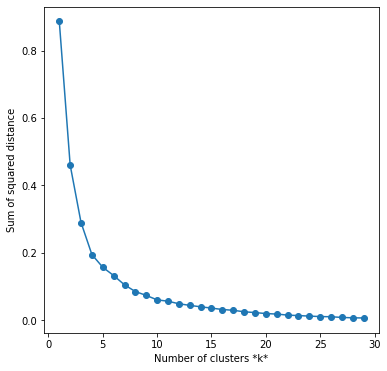

In [12]:

sse = []
list_k = list(range(1, 30))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(processed_df[["norm_x","norm_y"]])
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');